In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("./data/genresTrain.csv")
data_train.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
0,2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.002032,0.041056,0.000091,0.049627,0.000231,0.011265,0.000024,0.002177,0.000003,Pop
1,2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.005959,0.082830,0.001122,0.093622,0.003869,0.031467,0.000779,0.006716,0.000041,Blues
2,2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.002766,0.043652,0.000358,0.045415,0.000211,0.013850,0.000038,0.003069,0.000002,Pop
3,2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.002503,0.045159,0.000356,0.037388,0.000118,0.011897,0.000045,0.002645,0.000006,Jazz
4,2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.002703,0.047347,0.000302,0.049469,0.000606,0.014052,0.000152,0.003244,0.000029,Jazz


In [3]:
data_train.loc[data_train.loc[:,"GENRE"]=="Blues", "GENRE"] = 1
data_train.loc[data_train.loc[:,"GENRE"]=="Classical", "GENRE"] = 2
data_train.loc[data_train.loc[:,"GENRE"]=="Jazz", "GENRE"] = 3
data_train.loc[data_train.loc[:,"GENRE"]=="Metal", "GENRE"] = 4
data_train.loc[data_train.loc[:,"GENRE"]=="Pop", "GENRE"] = 5
data_train.loc[data_train.loc[:,"GENRE"]=="Rock", "GENRE"] = 6

In [4]:
data_test = pd.read_csv("./data/genresTest.csv")
data_test.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_2RMS_TCD,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR
0,2.5851,887.72,203130.0,-0.17260,-0.16509,-0.15114,-0.14272,-0.13747,-0.13437,-0.12990,...,0.014458,0.003283,0.060789,0.000173,0.049469,0.000209,0.014727,0.000058,0.003690,0.000007
1,2.4621,370.86,4835.0,-0.16553,-0.16676,-0.16022,-0.15304,-0.14354,-0.13443,-0.12450,...,0.007165,0.001832,0.019472,0.000006,0.021197,0.000100,0.008136,0.000055,0.002112,0.000006
2,2.5894,536.33,59175.0,-0.14433,-0.15838,-0.15151,-0.13966,-0.12591,-0.11795,-0.11744,...,0.009742,0.002032,0.037165,0.000158,0.037856,0.000123,0.009627,0.000068,0.001916,0.000004
3,2.4876,1053.70,147250.0,-0.12813,-0.11979,-0.12223,-0.11881,-0.12020,-0.12702,-0.13608,...,0.020571,0.002458,0.074786,0.000113,0.088109,0.000152,0.021083,0.000071,0.002590,0.000006
4,2.7968,354.90,7610.9,-0.16335,-0.16976,-0.17196,-0.16772,-0.16637,-0.15903,-0.13995,...,0.004825,0.001905,0.017377,0.000015,0.010852,0.000153,0.004702,0.000044,0.002101,0.000008


0.75 no dió buen resultado <br>
0.9 no dió un buen resultado <br>
0.85 mejor resultado hasta ahora <br>

In [5]:
m_cor = data_train.corr()

dict_l = {}
for i in m_cor.index:
    dict_l.update({i:m_cor[m_cor[i]>.85].index})


In [6]:
cols_drop = []
for idx in dict_l:
    if not (idx in cols_drop): #si ya está para eliminar no se revisa
        for j in range(len(dict_l[idx])):
            if idx != dict_l[idx][j]: #el se quiere mantener
                if not (dict_l[idx][j] in cols_drop): #si no se a eliminado se puede eliminar
                    cols_drop.append(dict_l[idx][j])
                    #print(idx, dict_l[idx][j])

print(len(cols_drop))
print(cols_drop)

47
['PAR_ZCD', 'PAR_2RMS_TCD', 'PAR_ZCD_10FR_MEAN', 'PAR_ASE2', 'PAR_ASE4', 'PAR_ASE5', 'PAR_ASE7', 'PAR_ASE11', 'PAR_ASE24', 'PAR_ASE26', 'PAR_ASE28', 'PAR_ASE30', 'PAR_ASEV2', 'PAR_ASEV3', 'PAR_ASEV5', 'PAR_ASEV7', 'PAR_SFM10', 'PAR_SFM12', 'PAR_SFM14', 'PAR_SFM15', 'PAR_SFM_M', 'PAR_SFM17', 'PAR_SFM19', 'PAR_SFMV20', 'PAR_MFCCV1', 'PAR_MFCCV2', 'PAR_MFCCV3', 'PAR_MFCCV4', 'PAR_MFCCV5', 'PAR_MFCCV6', 'PAR_MFCCV7', 'PAR_MFCCV8', 'PAR_MFCCV9', 'PAR_MFCCV10', 'PAR_MFCCV11', 'PAR_MFCCV12', 'PAR_MFCCV13', 'PAR_MFCCV14', 'PAR_MFCCV15', 'PAR_MFCCV16', 'PAR_MFCCV17', 'PAR_MFCCV18', 'PAR_MFCCV19', 'PAR_MFCCV20', 'PAR_1RMS_TCD_10FR_MEAN', 'PAR_2RMS_TCD_10FR_MEAN', 'PAR_3RMS_TCD_10FR_MEAN']


In [7]:
df_train_drop = data_train
df_test_drop = data_test
for idx in np.unique(cols_drop):
    df_train_drop = df_train_drop.drop(idx,axis=1)
    df_test_drop = df_test_drop.drop(idx,axis=1)

In [8]:
for i in df_train_drop.columns:
    if sum(df_train_drop[i] > 100) > (df_train_drop.shape[0]/2):
        print(i)
        df_train_drop = df_train_drop.drop(i, axis=1)
        df_test_drop = df_test_drop.drop(i, axis=1)

PAR_SC
PAR_SC_V


In [9]:
col_scalar = ["PAR_TC", "PAR_ASC", "PAR_ASS", "PAR_PEAK_RMS_TOT", "PAR_PEAK_RMS10FR_MEAN"]
#col_scalar = ["PAR_TC", "PAR_ASC", "PAR_ASS", "PAR_PEAK_RMS_TOT", "PAR_PEAK_RMS10FR_MEAN", "PAR_SC","PAR_SC_V"]
col_outliers = ["PAR_ASC_V"]

In [10]:
def column_scale(df, l_cols):
    """
    df: DataFrame de entrada
    l_cols: lista de columnas a escalar
    return: retorna un df con las columnas estandarizadas así:
    (X - mean(X))/(max(X)-min(X))
    """
    for col in l_cols:
        #se cambia cada columna
        df[col] = (df[col] - np.mean(df[col]))/(max(df[col]) - min(df[col]))
        #df[col] = (df[col] - min(df[col]))/((max(df[col]) - min(df[col])))
        ####### PROBAR ###########
        #df[col] = (df[col] - np.mean(df[col]))/(np.std(df[col]))
    return df

In [11]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

X_trdrop = column_scale(X_trdrop, col_scalar)
X_testdrop = df_test_drop
X_testdrop = column_scale(X_testdrop, col_scalar)

X_trdrop = X_trdrop.drop(col_outliers, axis=1)

X_testdrop = X_testdrop.drop(col_outliers, axis=1)

In [12]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_87.csv')

0.9988795518207283


In [13]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  6.698564593301436
clase 2:  23.655502392344495
clase 3:  35.63636363636364
clase 4:  2.373205741626794
clase 5:  11.138755980861244
clase 6:  20.497607655502392


In [18]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.1)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_86.csv')

0.9793517406962785


In [19]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  7.215311004784689
clase 2:  24.114832535885167
clase 3:  35.25358851674641
clase 4:  1.875598086124402
clase 5:  10.909090909090908
clase 6:  20.63157894736842


In [14]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=350, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_87.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  8.440191387559809
clase 2:  24.038277511961724
clase 3:  35.59808612440191
clase 4:  1.875598086124402
clase 5:  10.583732057416267
clase 6:  19.464114832535888


In [19]:
import pickle

filename = 'model_0.76005.sav'
pickle.dump(eclf1, open(filename, 'wb'))

### Cargar el modelo

###### load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) <br>
result = loaded_model.score(X_test, Y_test)<br>
print(result)

In [20]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=650, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_88.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  8.516746411483252
clase 2:  24.13397129186603
clase 3:  35.42583732057416
clase 4:  1.7607655502392343
clase 5:  10.717703349282298
clase 6:  19.444976076555022


In [22]:
filename = 'model_0.76451.sav'
pickle.dump(eclf1, open(filename, 'wb'))

In [12]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=650, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf4 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1)

eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc1', clf3),('gbc2', clf4)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_89.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [14]:
import pickle

filename = 'model_0xxxx.sav'
pickle.dump(eclf1, open(filename, 'wb'))

In [12]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=750, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_90.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  8.401913875598085
clase 2:  24.17224880382775
clase 3:  35.291866028708135
clase 4:  1.8564593301435406
clase 5:  10.813397129186603
clase 6:  19.464114832535888


In [14]:
import pickle

filename = 'model_0759.sav'
pickle.dump(eclf1, open(filename, 'wb'))

In [15]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=750, class_weight="balanced_subsample",n_jobs=2)
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=220, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_91.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  8.363636363636363
clase 2:  24.114832535885167
clase 3:  35.291866028708135
clase 4:  1.9138755980861244
clase 5:  10.717703349282298
clase 6:  19.598086124401913


In [17]:
import pickle

filename = 'model_075749.sav'
pickle.dump(eclf1, open(filename, 'wb'))

In [19]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=950, class_weight="balanced_subsample",n_jobs=2)
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_92.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
X_trdrop.head()

,PAR_TC,PAR_ASE1,PAR_ASE3,PAR_ASE6,PAR_ASE8,PAR_ASE9,PAR_ASE10,PAR_ASE12,PAR_ASE13,PAR_ASE14,...,PAR_THR_3RMS_10FR_VAR,PAR_PEAK_RMS_TOT,PAR_PEAK_RMS10FR_MEAN,PAR_PEAK_RMS10FR_VAR,PAR_1RMS_TCD,PAR_3RMS_TCD,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_VAR
0,0.025113,-0.12334,-0.11176,-0.11026,-0.12465,-0.13659,-0.13951,-0.13893,-0.14148,-0.14381,...,4.177900e-06,-0.048844,-0.002902,0.32300,0.048272,0.002032,0.000091,0.000231,0.000024,0.000003
1,0.064559,-0.17655,-0.17773,-0.16174,-0.14458,-0.14691,-0.15324,-0.14155,-0.15822,-0.11068,...,5.629600e-06,-0.011076,-0.001723,3.18450,0.085800,0.005959,0.001122,0.003869,0.000779,0.000041
2,0.012861,-0.13940,-0.11486,-0.10936,-0.12948,-0.12599,-0.12750,-0.13485,-0.12867,-0.14073,...,5.601000e-06,-0.052747,-0.003049,0.31701,0.044132,0.002766,0.000358,0.000211,0.000038,0.000002
3,-0.011978,-0.14995,-0.13800,-0.12340,-0.12010,-0.12907,-0.12677,-0.13761,-0.13426,-0.12630,...,2.591300e-05,-0.008712,-0.001919,1.74920,0.035492,0.002503,0.000356,0.000118,0.000045,0.000006
4,0.021440,-0.16863,-0.15935,-0.13002,-0.13167,-0.13584,-0.13075,-0.11369,-0.11557,-0.10882,...,9.754300e-07,0.013285,-0.001176,4.32160,0.046871,0.002703,0.000302,0.000606,0.000152,0.000029


In [12]:
import xgboost as xgb

In [43]:
clf = xgb.XGBClassifier()
clf.fit(X_trdrop, y_trdrop)

print(clf.score(X_trdrop, y_trdrop))
predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_93.csv')

0.9486994797919168


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [44]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  7.444976076555024
clase 2:  24.593301435406698
clase 3:  34.717703349282296
clase 4:  1.8181818181818181
clase 5:  10.526315789473683
clase 6:  20.89952153110048


In [46]:
clf = xgb.XGBClassifier(n_estimators=150, objective='multi:softprob', n_jobs=2)
clf.fit(X_trdrop, y_trdrop)

print(clf.score(X_trdrop, y_trdrop))
predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_94.csv')

0.9717486994797919


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
import pickle

filename = 'model_test94.sav'
pickle.dump(clf, open(filename, 'wb'))

In [49]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  7.119617224880383
clase 2:  23.84688995215311
clase 3:  35.406698564593306
clase 4:  1.9904306220095696
clase 5:  10.44976076555024
clase 6:  21.1866028708134


In [50]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=750, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf4 = xgb.XGBClassifier(n_estimators=150, objective='multi:softprob', n_jobs=1)

eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3), ('xgb', clf4)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_95.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9990396158463385


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [51]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  8.114832535885167
clase 2:  25.358851674641148
clase 3:  34.10526315789474
clase 4:  1.9712918660287082
clase 5:  11.138755980861244
clase 6:  19.311004784688997


In [52]:
import pickle

filename = 'model_test95.sav'
pickle.dump(clf, open(filename, 'wb'))

In [13]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=750, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf4 = xgb.XGBClassifier(n_estimators=250, objective='multi:softprob', n_jobs=1)

eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3), ('xgb', clf4)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_96.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9989595838335334


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [14]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  8.17224880382775
clase 2:  24.9377990430622
clase 3:  34.39234449760766
clase 4:  2.181818181818182
clase 5:  10.717703349282298
clase 6:  19.598086124401913


In [16]:
import pickle

filename = 'model_076707.sav'
pickle.dump(eclf1, open(filename, 'wb'))

In [19]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2)
clf4 = xgb.XGBClassifier(n_estimators=50, objective='multi:softprob', n_jobs=1)

eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3), ('xgb', clf4)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_98.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9809523809523809


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  8.61244019138756
clase 2:  25.454545454545453
clase 3:  33.933014354066984
clase 4:  1.7607655502392343
clase 5:  11.157894736842106
clase 6:  19.08133971291866


In [13]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=750, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf4 = xgb.XGBClassifier(n_estimators=350, objective='multi:softprob', n_jobs=1)

eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3), ('xgb', clf4)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_99.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9994397759103641


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [14]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  8.15311004784689
clase 2:  25.110047846889955
clase 3:  34.27751196172249
clase 4:  1.9712918660287082
clase 5:  11.330143540669857
clase 6:  19.157894736842103


In [15]:
import pickle

filename = 'model_test99.sav'
pickle.dump(eclf1, open(filename, 'wb'))

In [11]:
corr = [0.4,0.45,0.5,0.55,0.60,0.65,0.7,0.75,0.77,0.8,0.85,0.87,0.9,0.95]
score = []
for cor in corr:
    dict_l = {}
    for i in m_cor.index:
        dict_l.update({i:m_cor[m_cor[i]>0.75].index})
        
    cols_drop = []
    for idx in dict_l:
        if not (idx in cols_drop): #si ya está para eliminar no se revisa
            for j in range(len(dict_l[idx])):
                if idx != dict_l[idx][j]: #el se quiere mantener
                    if not (dict_l[idx][j] in cols_drop): #si no se a eliminado se puede eliminar
                        cols_drop.append(dict_l[idx][j])
                        #print(idx, dict_l[idx][j])

    df_train_drop = data_train
    df_test_drop = data_test
    for idx in np.unique(cols_drop):
        df_train_drop = df_train_drop.drop(idx,axis=1)
        df_test_drop = df_test_drop.drop(idx,axis=1)
        
    clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
    clf2 = DecisionTreeClassifier()
    clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
    eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
    score.append(np.mean(cross_val_score(eclf1,df_train_drop.drop("GENRE", axis=1), df_train_drop["GENRE"])))
    print("procesado: ", cor)

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.4


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.45


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.5


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.55


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.6


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.65


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.7


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.75


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.77


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.8


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.85


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.87


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.9


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


procesado:  0.95


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


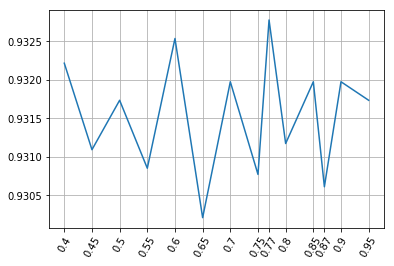

In [17]:
plt.plot(corr, score)
plt.grid()
plt.xticks(corr,corr, rotation=60);

In [18]:
score

[0.9322128851540618,
 0.9310924369747898,
 0.931732693077231,
 0.9308523409363745,
 0.9325330132052821,
 0.9302120848339337,
 0.9319727891156463,
 0.9307723089235694,
 0.9327731092436974,
 0.9311724689875951,
 0.9319727891156463,
 0.9306122448979591,
 0.9319727891156463,
 0.931732693077231]

In [26]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(df_train_drop.drop("GENRE", axis=1), df_train_drop["GENRE"])

print(eclf1.score(df_train_drop.drop("GENRE", axis=1), df_train_drop["GENRE"]))

predict = eclf1.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_80.csv')

1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  8.038277511961722
clase 2:  23.751196172248804
clase 3:  35.578947368421055
clase 4:  1.799043062200957
clase 5:  11.483253588516746
clase 6:  19.34928229665072


In [36]:
def generation_data(X, N, k):
    """
    Retorna nuevos datos generados a partir de los pasados en X.

    Parameters
    ----------
    X : dataframe con los datos minoritarios.
    N : (0-1] porcentaje de nuevos datos a generar.
    k : int. número de vecinos a utilizar.

    Returns
    -------
    S : array, shape = [N * n_minority_samples, n_features]
    """    
    from sklearn.neighbors import NearestNeighbors
    n_minority_samples, n_features = X.shape

    if (N<=0 or N>1): raise ValueError("N debe estar entre (0,1]")

    n_synthetic_samples = int(N * n_minority_samples)
    S = np.zeros(shape=(n_synthetic_samples, n_features))
    aux = np.zeros(shape=X.shape)
    #Learn nearest neighbours
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(X)

    #Calculate synthetic samples
    for i in range(n_minority_samples):
        nn = neigh.kneighbors(np.array(X.iloc[i]).reshape(1,-1), return_distance=False)
        for n in np.arange(N):
            nn_index = np.random.choice(nn[0])
            #NOTE: nn includes T[i], we don't want to select it 
            while nn_index == i:
                nn_index = np.random.choice(nn[0])

            dif = X.iloc[nn_index] - X.iloc[i]
            gap = np.random.random()
            aux[i] = X.iloc[i,:] + gap * dif[:]
    S = aux[np.random.choice(np.arange(aux.shape[0]),S.shape[0],replace=False),:]
    return S

In [34]:
X_train = df_train_drop.drop("GENRE", axis=1)
y_train = df_train_drop["GENRE"]

In [45]:
#5,1,4
clase = 6
X_aux = generation_data(X_train.loc[data_train["GENRE"]==clase], 0.2, 30)
X_aux = pd.DataFrame(X_aux, columns=X_train.columns)
X_new = pd.concat([X_new, X_aux])
y_new = np.concatenate((y_new,np.ones(X_aux.shape[0])*clase))
y_new = y_new.astype(int)

In [46]:
print(np.mean(y_new==1)*100)
print(np.mean(y_new==2)*100)
print(np.mean(y_new==3)*100)
print(np.mean(y_new==4)*100)
print(np.mean(y_new==5)*100)
print(np.mean(y_new==6)*100)

13.092226704040474
23.545498051548506
20.530525740069734
13.892117317289943
12.921309906337594
16.018322280713747


In [49]:
X_train.shape, y_train.shape, df_test_drop.shape

((12495, 123), (12495,), (5225, 123))

In [50]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

print(eclf1.score(X_train, y_train))

predict = eclf1.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_81.csv')

1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  7.904306220095695
clase 2:  24.019138755980862
clase 3:  35.406698564593306
clase 4:  1.8564593301435406
clase 5:  11.272727272727273
clase 6:  19.54066985645933


In [53]:
cross_val_score(eclf1, X_train, y_train, cv=10)

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

array([0.93535515, 0.93535515, 0.93136472, 0.92406075, 0.94635709,
       0.94230769, 0.9446672 , 0.9510826 , 0.95028067, 0.95348837])

In [55]:
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2, subsample=0.8, min_samples_leaf=10,
                                max_depth=8)

clf.fit(X_train, y_train)
clf.score(X_train,y_train)
predict = clf.predict(df_test_drop)

In [58]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  7.177033492822966
clase 2:  22.88995215311005
clase 3:  36.44019138755981
clase 4:  1.875598086124402
clase 5:  11.52153110047847
clase 6:  20.095693779904305


In [57]:
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_82.csv')

In [59]:
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2, subsample=0.8, min_samples_leaf=10,
                                max_depth=8)

clf.fit(X_new, y_new)
print(clf.score(X_new,y_new))
predict = clf.predict(df_test_drop)
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

1.0
clase 1:  6.507177033492822
clase 2:  23.157894736842106
clase 3:  35.942583732057415
clase 4:  2.660287081339713
clase 5:  11.540669856459331
clase 6:  20.191387559808614


In [61]:
predict

array([1, 2, 2, ..., 6, 5, 6])

In [62]:
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_83.csv')